<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Object%20Detection/Performance%20Metrics/Intersection_Over_Union.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Install selectivesearch Package

In [ ]:
!pip install -q selectivesearch

  Preparing metadata (setup.py) ... done


# Image File Download

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/NA.gif

--2023-10-17 04:07:33--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/NA.gif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168404 (164K) [image/gif]
Saving to: ‘NA.gif’

NA.gif              100%[===================>] 164.46K  --.-KB/s    in 0.1s    

2023-10-17 04:07:33 (1.60 MB/s) - ‘NA.gif’ saved [168404/168404]



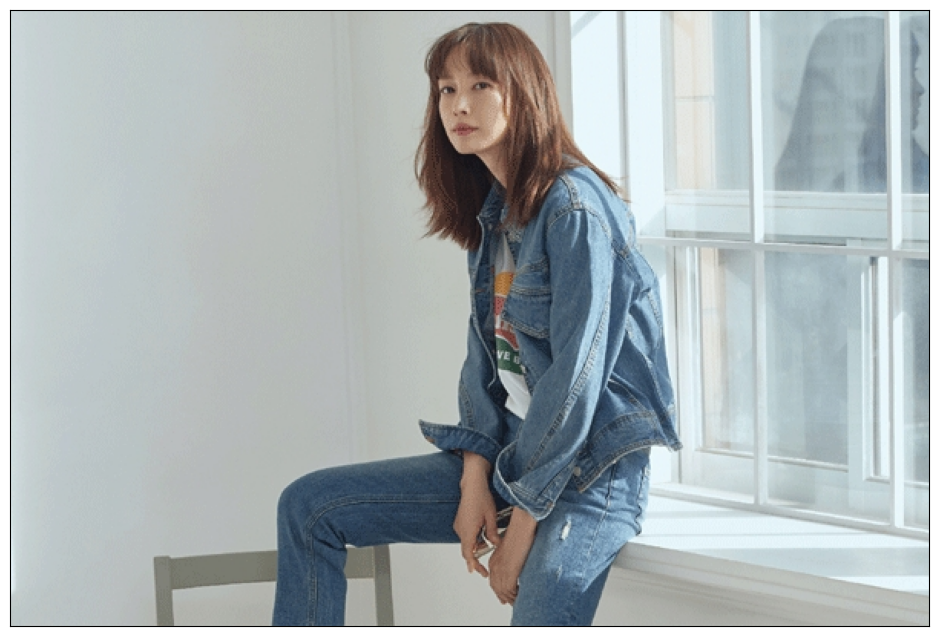

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/NA.gif')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12, 8))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# Intersection Over Union

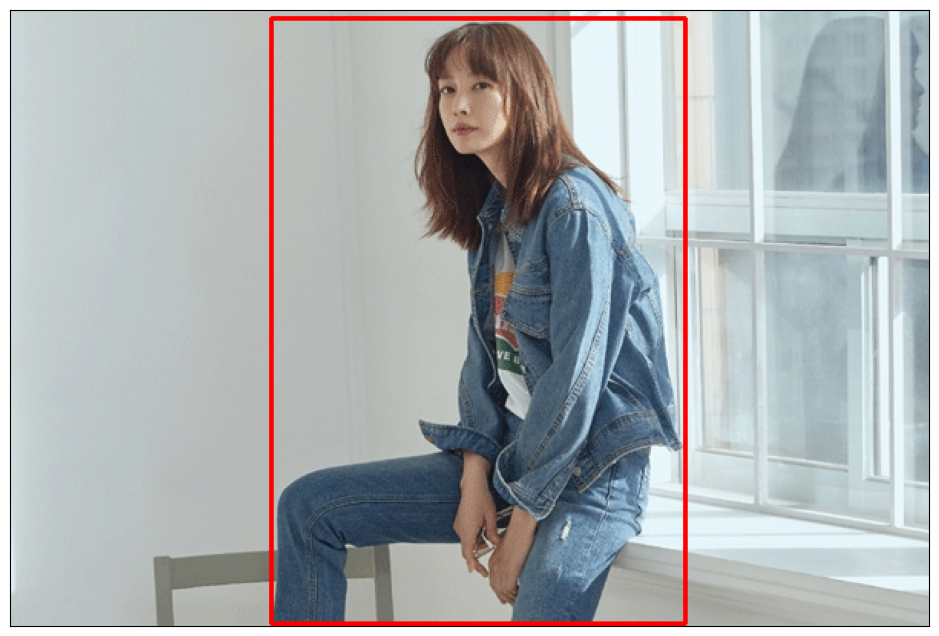

In [ ]:
import cv2
import matplotlib.pyplot as plt

gt_box = [170, 5, 440, 400]

img = cv2.imread('NA.gif')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb,
                        (gt_box[0], gt_box[1]),
                        (gt_box[2], gt_box[3]),
                        color = red,
                        thickness = 2)

plt.figure(figsize = (12, 8))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
import numpy as np

def compute_iou(cand_box, gt_box):
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.maximum(cand_box[2], gt_box[2])
  y2 = np.maximum(cand_box[3], gt_box[3])

  intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)

  cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
  gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
  union = cand_box_area + gt_box_area - intersection

  iou = round(intersection / union, 2)
  return iou

In [ ]:
import selectivesearch

img = cv2.imread('NA.gif')
img_rgb2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_, regions = selectivesearch.selective_search(img_rgb2,
                                              scale = 1000,
                                              min_size = 10000)

In [ ]:
gb_box = [170, 5, 440, 400]

cand_rects = [cand['rect'] for cand in regions]

for index, cand_box in enumerate(cand_rects):
  cand_box = list(cand_box)
  cand_box[2] = cand_box[2] + cand_box[0]
  cand_box[3] = cand_box[3] + cand_box[1]

  iou = compute_iou(cand_box, gt_box)
  print('index:', index, 'iou:', iou)

index: 0 iou: 0.77
index: 1 iou: 0.68
index: 2 iou: 0.79
index: 3 iou: 0.11
index: 4 iou: 1.25
index: 5 iou: 1.25


index: 0 iou: 0.77 rectangle: (0, 0, 348, 401)
index: 1 iou: 0.68 rectangle: (258, 0, 436, 401)
index: 2 iou: 0.79 rectangle: (403, 0, 599, 351)
index: 3 iou: 1.25 rectangle: (258, 0, 599, 401)
index: 4 iou: 1.25 rectangle: (258, 0, 599, 401)


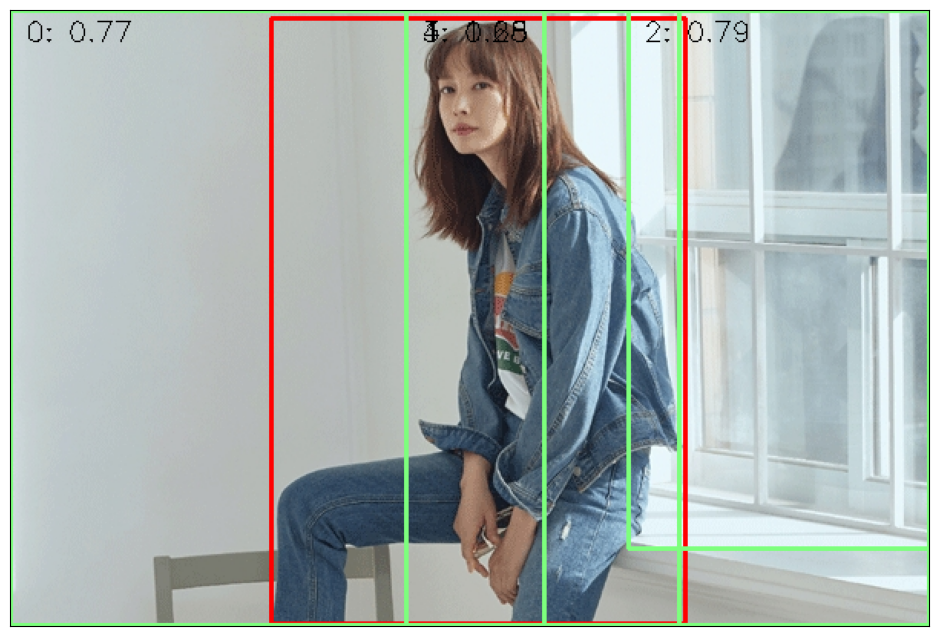

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('NA.gif')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cand_rects = [cand['rect'] for cand in regions if cand['size'] > 40000]

gt_box = [170, 5, 440, 400]
red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb,
                        (gt_box[0], gt_box[1]),
                        (gt_box[2], gt_box[3]),
                        color = red,
                        thickness = 2)

green_rgb = (125, 255, 125)
black_rgb = (0, 0, 0)
for index, cand_box in enumerate(cand_rects):

    cand_box = list(cand_box)
    cand_box[2] = cand_box[2] + cand_box[0]
    cand_box[3] = cand_box[3] + cand_box[1]

    iou = compute_iou(cand_box, gt_box)

    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
        cv2.rectangle(img_rgb,
                      (cand_box[0], cand_box[1]),
                      (cand_box[2], cand_box[3]),
                      color = green_rgb,
                      thickness = 2)

        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb,
                    text,
                    (cand_box[0] + 10, cand_box[1] + 20),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    color = black_rgb,
                    thickness = 1)

plt.figure(figsize = (12, 8))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()